<a href="https://colab.research.google.com/github/Kevin2558/Data_Science/blob/main/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/titanic-dataset


In [2]:
import pandas as pd

In [15]:
df = pd.read_csv(path + "/Titanic-Dataset.csv")

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df.dropna(inplace=True) # Elimina las filas que posean un valor nulo

In [11]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [22]:
df.fillna(df['Age'].mean(),inplace=True)

In [17]:
df['Cabin']

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN
...,...
886,NaN
887,B42
888,NaN
889,C148


<Axes: >

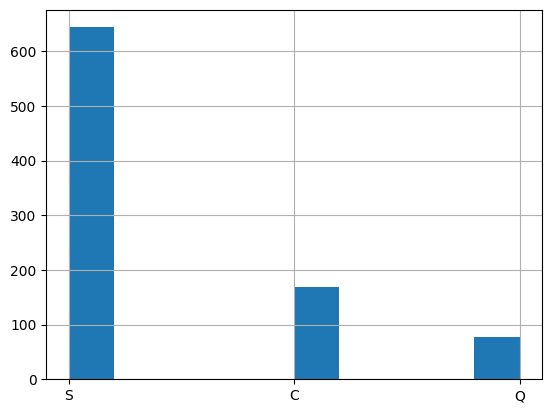

In [18]:
df['Embarked'].hist()

In [33]:
survived = df[df['Survived']==1]['Embarked']
not_survived = df[df['Survived']==0]['Embarked']

In [29]:
survived

,Embarked
1,C
2,S
3,S
8,S
9,C
...,...
875,C
879,C
880,S
887,S


In [24]:
import matplotlib.pyplot as plt

In [50]:
surv_counts = survived.value_counts()
nonsurv_counts = not_survived.value_counts()

# Align indices (in case some categories are missing in one group)
all_categories = sorted(list(set(surv_counts.index) | set(nonsurv_counts.index)))
surv_counts = surv_counts.reindex(all_categories, fill_value=0)
nonsurv_counts = nonsurv_counts.reindex(all_categories, fill_value=0)

# Now we can plot these as a grouped bar chart
width = 0.4
x = range(len(all_categories))

plt.bar(x, surv_counts.values, width=width, alpha=0.7, label='Survived')
plt.bar([i + width for i in x], nonsurv_counts.values, width=width, alpha=0.7, label='Not Survived')

plt.xticks([i + width/2 for i in x], all_categories)  # Label the x-axis with categories
plt.title('Comparación de Edad (Supervivencia)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.StrDType'>) -> None

In [36]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [38]:
most_common_embarked = df['Embarked'].value_counts().idxmax()

In [40]:
most_common_embarked

'S'

In [42]:
# Hacemos el rellenado de los nulos con valores especificos, en este caso
# rellenamos la edad con la mediana, la cabina con desconocido y el lugar de
# embarque con la moda.
df.fillna({'Age':df['Age'].median(),'Cabin':'Unknown','Embarked':most_common_embarked},inplace=True)

In [44]:
# Comprobamos que ahora no existen valores nulos en el dataframe
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [46]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# Empezaremos con el tratamiento de los datos outliers

# Calculamos los cuartiles
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

# Calculamos el rango intercuartil
IQR = Q3 - Q1

# Se define los cotas superiores e inferiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificamos los outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]

print("Total de outliers (metodo IQR):", len(outliers))

Total de outliers (metodo IQR): 66


In [51]:
import numpy as np

In [52]:
# Ahora procederemos a utilizar zscore para la clasificación de datos outliers.
# El zscore es una medida estadística que nos dice qué tan lejos o cerca está
# un valor del promedio de un grupo de valores.

mean_age = df['Age'].mean()
std_age = df['Age'].std()

In [53]:
z_scores = (df['Age']-mean_age)/std_age

In [55]:
z_scores

,Age
0,-0.592148
1,0.638430
2,-0.284503
3,0.407697
4,0.407697
...,...
886,-0.207592
887,-0.822881
888,0.000000
889,-0.284503


In [56]:
outliers_zscore = df[np.abs(z_scores) > 3]

In [58]:
# Notemos que el numero de outliers varia respecto al método que utilicemos

print("Total de outliers (metodo zscore):", len(outliers_zscore))

Total de outliers (metodo zscore): 7


In [60]:
from scipy.stats import zscore

In [61]:
# Usamos la la libreria para automatizar lo que recien hicimos

z = zscore(df['Age'])

In [62]:
z

,Age
0,-0.592481
1,0.638789
2,-0.284663
3,0.407926
4,0.407926
...,...
886,-0.207709
887,-0.823344
888,0.000000
889,-0.284663


In [64]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/housesalesprediction


In [65]:
df_houses = pd.read_csv(path + "/kc_house_data.csv")

In [66]:
df_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [67]:
import seaborn as sns

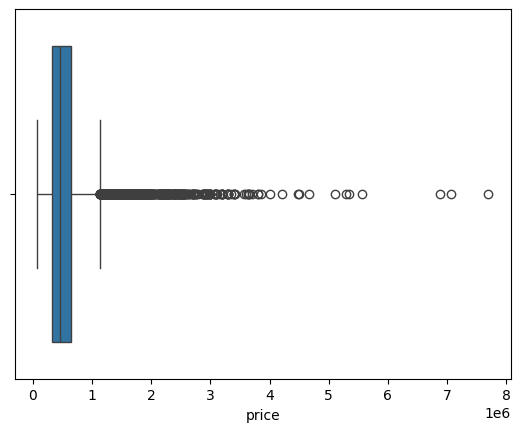

In [68]:
# Utilizamos el boxplot para observar los datos outliers

sns.boxplot(x=df_houses['price'])
plt.show()

In [70]:
Q1 = df_houses['price'].quantile(0.25)
Q3 = df_houses['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_houses[(df_houses['price'] < lower_bound) | (df_houses['price'] > upper_bound)]

In [72]:
# Utilizamos sort_values para ordenar los datos y ascending=False para que sea
# en orden descendente

outliers['price'].sort_values(ascending=False)

,price
7252,7700000.0
3914,7062500.0
9254,6885000.0
4411,5570000.0
1448,5350000.0
...,...
3103,1130000.0
11927,1130000.0
4623,1130000.0
4680,1130000.0


In [74]:
z_scores = zscore(df_houses['price'])

In [75]:
outliers_zscore = df_houses[np.abs(z_scores) > 3]

In [76]:
outliers_zscore['price'].sort_values(ascending=False)

,price
7252,7700000.0
3914,7062500.0
9254,6885000.0
4411,5570000.0
1448,5350000.0
...,...
2179,1650000.0
3777,1650000.0
18511,1650000.0
9737,1648000.0
